In [1]:
import pandas as pd
import numpy as np

In [2]:
job_posting = pd.read_csv('job_postings.csv')

columns_to_keep = [
    'job_id',
    'company_id',
    'description',
    'max_salary',
    'med_salary',
    'min_salary',
    'pay_period',
    'remote_allowed',
    'currency',
    'sponsored',
    'formatted_work_type',
    'formatted_experience_level',
    'title',
    'application_type'
]

# Keeping only the specified columns
filtered_job_posting = job_posting[columns_to_keep]

In [3]:
filtered_job_posting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33246 entries, 0 to 33245
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   description                 33245 non-null  object 
 3   max_salary                  11111 non-null  float64
 4   med_salary                  2241 non-null   float64
 5   min_salary                  11111 non-null  float64
 6   pay_period                  13352 non-null  object 
 7   remote_allowed              4802 non-null   float64
 8   currency                    13352 non-null  object 
 9   sponsored                   33246 non-null  int64  
 10  formatted_work_type         33246 non-null  object 
 11  formatted_experience_level  24065 non-null  object 
 12  title                       33246 non-null  object 
 13  application_type            332

In [4]:
filtered_job_posting['remote_allowed']=filtered_job_posting['remote_allowed'].fillna(0)
filtered_job_posting

/var/folders/1p/9kshtkh93v3dymsqz7z4lfx40000gn/T/ipykernel_16517/3824811384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_job_posting['remote_allowed']=filtered_job_posting['remote_allowed'].fillna(0)


,job_id,company_id,description,max_salary,med_salary,min_salary,pay_period,remote_allowed,currency,sponsored,formatted_work_type,formatted_experience_level,title,application_type
0,3757940104,553718.0,Overview\n\nHearingLife is a national hearing ...,NaN,5250.00,NaN,MONTHLY,0.0,USD,0,Full-time,Entry level,Hearing Care Provider,OffsiteApply
1,3757940025,2192142.0,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,NaN,NaN,NaN,0.0,NaN,0,Full-time,NaN,Shipping & Receiving Associate 2nd shift (Beav...,OffsiteApply
2,3757938019,474443.0,\nThe TSUBAKI name is synonymous with excellen...,NaN,NaN,NaN,NaN,0.0,NaN,0,Full-time,NaN,"Manager, Engineering",OffsiteApply
3,3757938018,18213359.0,descriptionTitle\n\n Looking for a great oppor...,NaN,22.27,NaN,HOURLY,0.0,USD,0,Full-time,Entry level,Cook,OffsiteApply
4,3757937095,437225.0,"Job Summary\nAt iHerb, we are on a mission to ...",275834.0,NaN,205956.0,YEARLY,1.0,USD,0,Full-time,Mid-Senior level,Principal Cloud Security Architect (Remote),OffsiteApply
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,0.0,NaN,0,Full-time,NaN,Sales Manager,ComplexOnsiteApply
33242,108965123,NaN,"A fast-fashion wholesaler, is looking for a fu...",NaN,NaN,NaN,NaN,0.0,NaN,0,Full-time,NaN,Office Administrative Assistant,ComplexOnsiteApply
33243,102339515,52132271.0,DuctVentz is a dryer and A/C – heat vent clean...,NaN,NaN,NaN,NaN,0.0,NaN,0,Full-time,NaN,Franchise Owner,SimpleOnsiteApply
33244,85008768,NaN,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,0.0,USD,1,Full-time,NaN,Licensed Insurance Agent,ComplexOnsiteApply


In [5]:
#Load all other files
benefits= pd.read_csv('benefits.csv')
job_skills = pd.read_csv('job_skills.csv')
job_industries = pd.read_csv('job_industries.csv')
industries=pd.read_csv('industries.csv')
salaries = pd.read_csv('salaries.csv')

1.Clean job_skills by combing skills with '_';   
&nbsp;&nbsp;Found 1875 differdent skill set;   
&nbsp;&nbsp;No na


In [6]:
job_skills_1= job_skills.groupby('job_id')['skill_abr'].apply('_'.join).reset_index()
print(job_skills_1)
print(job_skills_1['job_id'].nunique())
print()
print(job_skills_1.isna().any().any())

           job_id    skill_abr
0         3958427  DSGN_ART_IT
1        85008768      SALE_BD
2       102339515      BD_SALE
3       108965123          ADM
4       133114754      SALE_BD
...           ...          ...
32417  3757937095           IT
32418  3757938018    MGMT_MNFC
32419  3757938019          ENG
32420  3757940025    MGMT_MNFC
32421  3757940104         OTHR

[32422 rows x 2 columns]
32422

False


2.Clean benefits by combing type with '_';  
&nbsp;&nbsp;Found 770 different benefit type sets;  
&nbsp;&nbsp;No na

In [7]:
benefits_1= benefits.groupby('job_id')['type'].apply('_'.join).reset_index()
print(benefits_1)
print(benefits_1['type'].nunique())
print()
print(benefits_1.isna().any().any())

           job_id                                               type
0         3958427                                  Medical insurance
1        85008768  Medical insurance_Vision insurance_Dental insu...
2       133114754          Medical insurance_401(k)_Vision insurance
3       529257371  Medical insurance_Vision insurance_Dental insu...
4       967848246                                             401(k)
...           ...                                                ...
11642  3757935025       401(k)_Vision insurance_Disability insurance
11643  3757935381                            401(k)_Vision insurance
11644  3757935384                                             401(k)
11645  3757937004       Vision insurance_401(k)_Disability insurance
11646  3757940104             Medical insurance_Disability insurance

[11647 rows x 2 columns]
770

False


3.Clean industry  
&nbsp;&nbsp;Merge job_industries and industries;  
&nbsp;&nbsp;Drop na industry_name;  
&nbsp;&nbsp;Clean the merged_industries by combing industries with '_';  
&nbsp;&nbsp;Found 2423 different industry set;  
&nbsp;&nbsp;No na  

In [8]:
merged_industries=job_industries.merge(industries, on='industry_id', how='left')
merged_industries.dropna(subset=['industry_name'], inplace=True)
industries_1= merged_industries.groupby('job_id')['industry_name'].apply('_'.join).reset_index()
print(industries_1)
print(industries_1['industry_name'].nunique())
print()
print(industries_1.isna().any().any())

           job_id                                      industry_name
0         3958427                Personal Care Product Manufacturing
1        85008768                                          Insurance
2       102339515                                  Consumer Services
3       108965123                         Retail Apparel and Fashion
4       133114754                               Truck Transportation
...           ...                                                ...
33053  3757937095  Retail_Manufacturing_Technology, Information a...
33054  3757938018                           Non-profit Organizations
33055  3757938019                 Automation Machinery Manufacturing
33056  3757940025                 Industrial Machinery Manufacturing
33057  3757940104                    Medical Equipment Manufacturing

[33058 rows x 2 columns]
2423

False


4.Clean salaries  
&nbsp;&nbsp;Merge filtered job posting with salaries;  
&nbsp;&nbsp;calculate the med_salary;  

In [9]:
salaries.shape

(13352, 8)

In [10]:
merged_job_salary = pd.merge(filtered_job_posting, salaries[['job_id', 'max_salary', 'min_salary', 'med_salary','pay_period']], on='job_id', how='left', suffixes=('_post', '_sal'))
# Function to calculate median salary if missing
def calc_median_salary(row):
    if pd.notna(row['med_salary_post']):
        return row['med_salary_post']
    elif pd.notna(row['med_salary_sal']):
        return row['med_salary_sal']
    else:
        max_salary = row['max_salary_sal'] if pd.notna(row['max_salary_sal']) else row['max_salary_post']
        min_salary = row['min_salary_sal'] if pd.notna(row['min_salary_sal']) else row['min_salary_post']
        if pd.notna(max_salary) and pd.notna(min_salary):
            return (max_salary + min_salary) / 2
        return None

# Apply the calculation
merged_job_salary['med_salary'] = merged_job_salary.apply(calc_median_salary, axis=1)

# Remove the temporary columns used for merging
merged_job_salary_1 = merged_job_salary.drop(columns=['med_salary_sal', 'max_salary_sal', 'min_salary_sal', 'med_salary_post', 'max_salary_post', 'min_salary_post'])
merged_job_salary_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33246 entries, 0 to 33245
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      33246 non-null  int64  
 1   company_id                  32592 non-null  float64
 2   description                 33245 non-null  object 
 3   pay_period_post             13352 non-null  object 
 4   remote_allowed              33246 non-null  float64
 5   currency                    13352 non-null  object 
 6   sponsored                   33246 non-null  int64  
 7   formatted_work_type         33246 non-null  object 
 8   formatted_experience_level  24065 non-null  object 
 9   title                       33246 non-null  object 
 10  application_type            33246 non-null  object 
 11  pay_period_sal              13352 non-null  object 
 12  med_salary                  13352 non-null  float64
dtypes: float64(3), int64(2), object

In [11]:
#joined job table,keep the common company_id
job_joined= merged_job_salary_1.merge(benefits_1, on='job_id', how='left') \
                  .merge(job_skills_1, on='job_id', how='left') \
                  .merge(industries_1, on='job_id', how='left')
job_joined

,job_id,company_id,description,pay_period_post,remote_allowed,currency,sponsored,formatted_work_type,formatted_experience_level,title,application_type,pay_period_sal,med_salary,type,skill_abr,industry_name
0,3757940104,553718.0,Overview\n\nHearingLife is a national hearing ...,MONTHLY,0.0,USD,0,Full-time,Entry level,Hearing Care Provider,OffsiteApply,MONTHLY,5250.00,Medical insurance_Disability insurance,OTHR,Medical Equipment Manufacturing
1,3757940025,2192142.0,Metalcraft of Mayville\nMetalcraft of Mayville...,NaN,0.0,NaN,0,Full-time,NaN,Shipping & Receiving Associate 2nd shift (Beav...,OffsiteApply,NaN,NaN,NaN,MGMT_MNFC,Industrial Machinery Manufacturing
2,3757938019,474443.0,\nThe TSUBAKI name is synonymous with excellen...,NaN,0.0,NaN,0,Full-time,NaN,"Manager, Engineering",OffsiteApply,NaN,NaN,NaN,ENG,Automation Machinery Manufacturing
3,3757938018,18213359.0,descriptionTitle\n\n Looking for a great oppor...,HOURLY,0.0,USD,0,Full-time,Entry level,Cook,OffsiteApply,HOURLY,22.27,NaN,MGMT_MNFC,Non-profit Organizations
4,3757937095,437225.0,"Job Summary\nAt iHerb, we are on a mission to ...",YEARLY,1.0,USD,0,Full-time,Mid-Senior level,Principal Cloud Security Architect (Remote),OffsiteApply,YEARLY,240895.00,NaN,IT,"Retail_Manufacturing_Technology, Information a..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33241,133114754,77766802.0,Are you a dynamic and creative marketing profe...,NaN,0.0,NaN,0,Full-time,NaN,Sales Manager,ComplexOnsiteApply,NaN,NaN,Medical insurance_401(k)_Vision insurance,SALE_BD,Truck Transportation
33242,108965123,NaN,"A fast-fashion wholesaler, is looking for a fu...",NaN,0.0,NaN,0,Full-time,NaN,Office Administrative Assistant,ComplexOnsiteApply,NaN,NaN,NaN,ADM,Retail Apparel and Fashion
33243,102339515,52132271.0,DuctVentz is a dryer and A/C – heat vent clean...,NaN,0.0,NaN,0,Full-time,NaN,Franchise Owner,SimpleOnsiteApply,NaN,NaN,NaN,BD_SALE,Consumer Services
33244,85008768,NaN,While many industries were hurt by the last fe...,YEARLY,0.0,USD,1,Full-time,NaN,Licensed Insurance Agent,ComplexOnsiteApply,YEARLY,48880.00,Medical insurance_Vision insurance_Dental insu...,SALE_BD,Insurance


In [12]:
#combine two pay_period columns
job_joined['pay_period'] = job_joined['pay_period_post'].combine_first(job_joined['pay_period_sal'])
job_joined.drop(columns=['pay_period_post', 'pay_period_sal'], inplace=True)



In [13]:
job_joined.rename(columns={'type': 'benefits'}, inplace=True)

job_joined.head()

,job_id,company_id,description,remote_allowed,currency,sponsored,formatted_work_type,formatted_experience_level,title,application_type,med_salary,benefits,skill_abr,industry_name,pay_period
0,3757940104,553718.0,Overview\n\nHearingLife is a national hearing ...,0.0,USD,0,Full-time,Entry level,Hearing Care Provider,OffsiteApply,5250.00,Medical insurance_Disability insurance,OTHR,Medical Equipment Manufacturing,MONTHLY
1,3757940025,2192142.0,Metalcraft of Mayville\nMetalcraft of Mayville...,0.0,NaN,0,Full-time,NaN,Shipping & Receiving Associate 2nd shift (Beav...,OffsiteApply,NaN,NaN,MGMT_MNFC,Industrial Machinery Manufacturing,NaN
2,3757938019,474443.0,\nThe TSUBAKI name is synonymous with excellen...,0.0,NaN,0,Full-time,NaN,"Manager, Engineering",OffsiteApply,NaN,NaN,ENG,Automation Machinery Manufacturing,NaN
3,3757938018,18213359.0,descriptionTitle\n\n Looking for a great oppor...,0.0,USD,0,Full-time,Entry level,Cook,OffsiteApply,22.27,NaN,MGMT_MNFC,Non-profit Organizations,HOURLY
4,3757937095,437225.0,"Job Summary\nAt iHerb, we are on a mission to ...",1.0,USD,0,Full-time,Mid-Senior level,Principal Cloud Security Architect (Remote),OffsiteApply,240895.00,NaN,IT,"Retail_Manufacturing_Technology, Information a...",YEARLY


In [14]:
def convert_to_yearly(row):
    if row['pay_period'] == 'YEARLY':
        return row['med_salary']  # Already yearly, no change needed
    elif row['pay_period'] == 'MONTHLY':
        return row['med_salary'] * 12  # Convert monthly to yearly
    elif row['pay_period'] == 'WEEKLY':
        return row['med_salary'] * 52
    elif row['pay_period'] == 'HOURLY':
        return row['med_salary'] * 2080  # Convert hourly to yearly (40 * 52 weeks)
    else:
        return row['med_salary']  # If no specific conversion is possible, return as is

# Apply the conversion to the dataset
job_joined['yearly_salary'] = job_joined.apply(convert_to_yearly, axis=1)

# Update pay_period to 'YEARLY' for all entries
job_joined['pay_period'] = 'YEARLY'

# Display the updated dataframe with new yearly salary column
job_joined.head()

,job_id,company_id,description,remote_allowed,currency,sponsored,formatted_work_type,formatted_experience_level,title,application_type,med_salary,benefits,skill_abr,industry_name,pay_period,yearly_salary
0,3757940104,553718.0,Overview\n\nHearingLife is a national hearing ...,0.0,USD,0,Full-time,Entry level,Hearing Care Provider,OffsiteApply,5250.00,Medical insurance_Disability insurance,OTHR,Medical Equipment Manufacturing,YEARLY,63000.0
1,3757940025,2192142.0,Metalcraft of Mayville\nMetalcraft of Mayville...,0.0,NaN,0,Full-time,NaN,Shipping & Receiving Associate 2nd shift (Beav...,OffsiteApply,NaN,NaN,MGMT_MNFC,Industrial Machinery Manufacturing,YEARLY,NaN
2,3757938019,474443.0,\nThe TSUBAKI name is synonymous with excellen...,0.0,NaN,0,Full-time,NaN,"Manager, Engineering",OffsiteApply,NaN,NaN,ENG,Automation Machinery Manufacturing,YEARLY,NaN
3,3757938018,18213359.0,descriptionTitle\n\n Looking for a great oppor...,0.0,USD,0,Full-time,Entry level,Cook,OffsiteApply,22.27,NaN,MGMT_MNFC,Non-profit Organizations,YEARLY,46321.6
4,3757937095,437225.0,"Job Summary\nAt iHerb, we are on a mission to ...",1.0,USD,0,Full-time,Mid-Senior level,Principal Cloud Security Architect (Remote),OffsiteApply,240895.00,NaN,IT,"Retail_Manufacturing_Technology, Information a...",YEARLY,240895.0


Load company related files  

In [15]:
companies = pd.read_csv('companies.csv')
#companies_industries = pd.read_csv('company_industries.csv')
#companies_spel = pd.read_csv('company_specialities.csv')
employee_counts = pd.read_csv('employee_counts.csv')

1.Clean companies remove needless columns  
company_id are all unique  
drop na(only two lines)  


In [16]:
companies_to_keep=['company_id','description','name','country','city']
companies_1=companies[companies_to_keep]
companies_1.dropna(inplace=True)
companies_1.info()
print(companies_1.isna().any().any())
print(companies_1['company_id'].is_unique)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11216 entries, 0 to 11360
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   company_id   11216 non-null  int64 
 1   description  11216 non-null  object
 2   name         11216 non-null  object
 3   country      11216 non-null  object
 4   city         11216 non-null  object
dtypes: int64(1), object(4)
memory usage: 525.8+ KB
False
True


/var/folders/1p/9kshtkh93v3dymsqz7z4lfx40000gn/T/ipykernel_16517/3320482599.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companies_1.dropna(inplace=True)


2.Clean employee_counts  
remove needless columns;  
check unique and drop duplicates, keep the most updated one;  
no na

In [17]:
updated_employee_counts = employee_counts.drop_duplicates(subset='company_id', keep='last')
print(updated_employee_counts['company_id'].is_unique)
updated_employee_counts.info()

True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11323 entries, 0 to 14274
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company_id      11323 non-null  int64  
 1   employee_count  11323 non-null  int64  
 2   follower_count  11323 non-null  int64  
 3   time_recorded   11323 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 442.3 KB


3.Join job_joined with updated_employee_counts and companies_1  

In [18]:
#joined company table,keep the common company_id
job_company_joined= job_joined.merge(companies_1, on='company_id', how='left') \
.merge(updated_employee_counts, on='company_id', how='left')

In [19]:
#drop na

job_company_joined = job_company_joined.dropna(subset=['med_salary'])
job_company_joined.info()
#drop companyid； state=us；city

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13352 entries, 0 to 33245
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      13352 non-null  int64  
 1   company_id                  13130 non-null  float64
 2   description_x               13352 non-null  object 
 3   remote_allowed              13352 non-null  float64
 4   currency                    13352 non-null  object 
 5   sponsored                   13352 non-null  int64  
 6   formatted_work_type         13352 non-null  object 
 7   formatted_experience_level  9790 non-null   object 
 8   title                       13352 non-null  object 
 9   application_type            13352 non-null  object 
 10  med_salary                  13352 non-null  float64
 11  benefits                    5852 non-null   object 
 12  skill_abr                   13056 non-null  object 
 13  industry_name               131

In [20]:
#only keep not na in experience level, and country==us
job_company_joined_1 = job_company_joined.dropna(subset=['formatted_experience_level'])
job_company_joined_2 = job_company_joined_1[job_company_joined_1['country']=='US']
job_company_joined_3=job_company_joined_2.drop(['city','country','benefits','med_salary','time_recorded'], axis=1)
#change type
job_company_joined_3[['company_id','remote_allowed']]=job_company_joined_3[['company_id','remote_allowed']].astype(int)
job_company_joined_3[['company_id','job_id']]=job_company_joined_3[['company_id','job_id']].astype(str)
job_company_joined_3[['employee_count','follower_count']]=job_company_joined_3[['employee_count','follower_count']].astype(int)


In [21]:
# Combining 'description_x' (from job postings) and 'description_y' (from companies) into one column
job_company_joined_3['combined_description'] = job_company_joined_3['description_x'].astype(str) + " " + job_company_joined_3['description_y'].astype(str)
job_company_joined_final=job_company_joined_3.drop(['description_x','description_y'],axis=1)

In [22]:
job_company_joined_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8950 entries, 0 to 33217
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   job_id                      8950 non-null   object 
 1   company_id                  8950 non-null   object 
 2   remote_allowed              8950 non-null   int64  
 3   currency                    8950 non-null   object 
 4   sponsored                   8950 non-null   int64  
 5   formatted_work_type         8950 non-null   object 
 6   formatted_experience_level  8950 non-null   object 
 7   title                       8950 non-null   object 
 8   application_type            8950 non-null   object 
 9   skill_abr                   8950 non-null   object 
 10  industry_name               8944 non-null   object 
 11  pay_period                  8950 non-null   object 
 12  yearly_salary               8950 non-null   float64
 13  name                        8950

In [23]:
job_company_joined_final.to_csv('cleaned_data.csv', index=False)

In [24]:
#EDA Ideas: bar plot of top 10 skills that are needed most using job_skills.

In [25]:
job_company_joined_final.head()

,job_id,company_id,remote_allowed,currency,sponsored,formatted_work_type,formatted_experience_level,title,application_type,skill_abr,industry_name,pay_period,yearly_salary,name,employee_count,follower_count,combined_description
0,3757940104,553718,0,USD,0,Full-time,Entry level,Hearing Care Provider,OffsiteApply,OTHR,Medical Equipment Manufacturing,YEARLY,63000.0,HearingLife,1171,11417,Overview\n\nHearingLife is a national hearing ...
3,3757938018,18213359,0,USD,0,Full-time,Entry level,Cook,OffsiteApply,MGMT_MNFC,Non-profit Organizations,YEARLY,46321.6,Episcopal Communities & Services,36,305,descriptionTitle\n\n Looking for a great oppor...
4,3757937095,437225,1,USD,0,Full-time,Mid-Senior level,Principal Cloud Security Architect (Remote),OffsiteApply,IT,"Retail_Manufacturing_Technology, Information a...",YEARLY,240895.0,"iHerb, LLC",1260,51651,"Job Summary\nAt iHerb, we are on a mission to ..."
8,3757936097,18213359,0,USD,0,Full-time,Entry level,Dishwasher,OffsiteApply,MGMT_MNFC,Non-profit Organizations,YEARLY,40144.0,Episcopal Communities & Services,36,305,"descriptionTitle\n\n $2,000 Sign-on Bonus Guar..."
11,3757935381,19181907,1,USD,0,Full-time,Entry level,Insights Analyst - Auto Industry,OffsiteApply,RSCH_ANLS_IT,Market Research,YEARLY,61000.0,Escalent,894,72044,Who We Are\n\nEscalent is an award-winning dat...


In [36]:
import matplotlib.pyplot as plt
job_company_joined_final = job_company_joined_final[job_company_joined_final['yearly_salary'] > 0]
# Let's assume you want 5 bins for the histogram
num_bins = 5

# Assuming df is your full DataFrame containing the 'yearly_salary' column

# Find the minimum and maximum yearly salary
min_salary = job_company_joined_final['yearly_salary'].min()
max_salary = job_company_joined_final['yearly_salary'].max()

# Create 5 equal-width bins from min to max
bin_edges = np.linspace(min_salary, max_salary, num_bins + 1)

# Now you can assign these bins to a new column in your DataFrame
job_company_joined_final['salary_bin'] = pd.cut(job_company_joined_final['yearly_salary'], bins=bin_edges)

# To verify the bins, you can print or return them
print(bin_edges)


[1.50000000e+01 6.86400120e+07 1.37280009e+08 2.05920006e+08
 2.74560003e+08 3.43200000e+08]


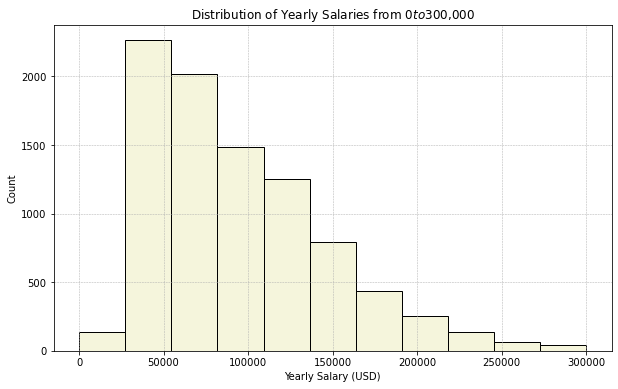

In [54]:
# Define the range and bins for the histogram focusing on $50,000 to $200,000
salary_range = job_company_joined_final['yearly_salary'][(job_company_joined_final['yearly_salary'] >= 0) & (job_company_joined_final['yearly_salary'] <= 300000)]
bins = np.linspace(0, 300000, 12)

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(salary_range, bins=bins, color='beige', edgecolor='black')
plt.title('Distribution of Yearly Salaries from $0 to $300,000')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('Count')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()
